In [61]:
from torch.utils.data import Dataset
import torch
import glob
import torchaudio
import pandas as pd
from datetime import datetime
import os

import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
from scipy import signal

In [88]:
sensors = ['C1.1.1'] #['C1.1.1', 'C16.1.3', 'C4.2.3']
start_time, end_time = "05/12/2021 23:50", "06/12/2021 00:00"
path = "./traffic/"

start = datetime.strptime(start_time, '%d/%m/%Y %H:%M')
end = datetime.strptime(end_time, '%d/%m/%Y %H:%M')

ldf = list()
for p in glob.glob(path + "*.csv"):
    name = os.path.split(p)[-1]
    nstr = datetime.strptime(name, 'traffic_%Y%m%dH%H%M%S.csv')
    if start <= nstr < end:
        df_tmp = pd.read_csv(p)
        c_drop = set(df_tmp.columns) - set(["sens_pos", "z", "ts"])
        if len(c_drop) > 0:
            df_tmp.drop(columns=list(c_drop), inplace=True)
        ldf.append(df_tmp)
df = pd.concat(ldf).sort_values(by=['sens_pos', 'ts'])
df.reset_index(inplace=True, drop=True)

df = df[df['sens_pos'].isin(sensors)]
df['ts'] = pd.to_datetime(df['ts'], unit='ms')
signald = np.array(df['z'])

In [94]:
def plotSpectrogram(signal, sr, hop_length, y_axis='linear'):
  plt.figure(figsize=(10, 5))
  plt.title('spectrogram from FFT')
  librosa.display.specshow(signal,
                           sr=sr,
                           hop_length=hop_length,
                           x_axis="time",
                           y_axis=y_axis)
  plt.colorbar(format="%+2.f", label='dB')

In [90]:
signald.shape
signalN = signald-np.mean(signald)

Text(0.5, 1.0, 'Original signal')

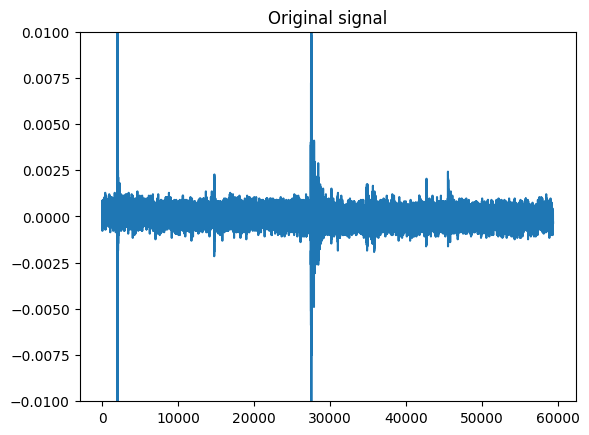

In [91]:
plt.plot(signalN)
plt.ylim([-0.01, 0.01])
plt.title('Original signal')

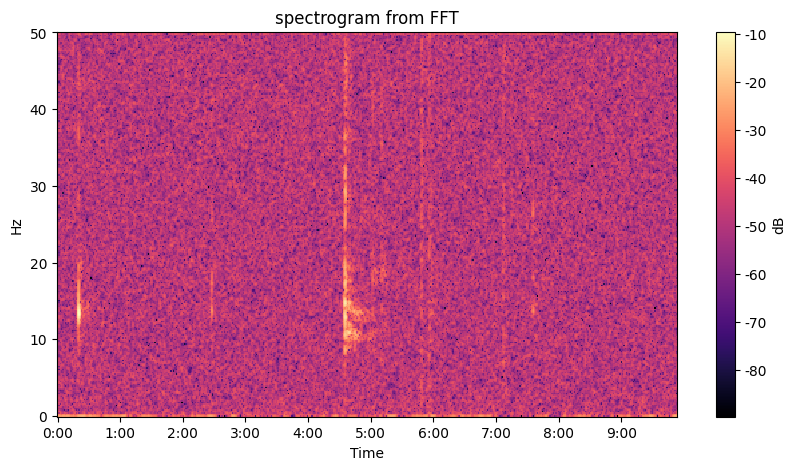

In [95]:
#window = getChunk(signal, i)
FRAME_SIZE = 512 #in frames
HOP_SIZE = 128
sr = 100
total = int((len(signald)-(FRAME_SIZE))/(HOP_SIZE))
S_scale = librosa.stft(signalN, n_fft=FRAME_SIZE,win_length = FRAME_SIZE, hop_length=HOP_SIZE)

#Y_scale = np.abs(S_scale) ** 2
#Y_log_scale = librosa.power_to_db(Y_scale)

Y_scale = np.abs(S_scale)
Y_log_scale = librosa.amplitude_to_db(Y_scale)

plotSpectrogram(Y_log_scale, sr, hop_length=HOP_SIZE, y_axis='linear')

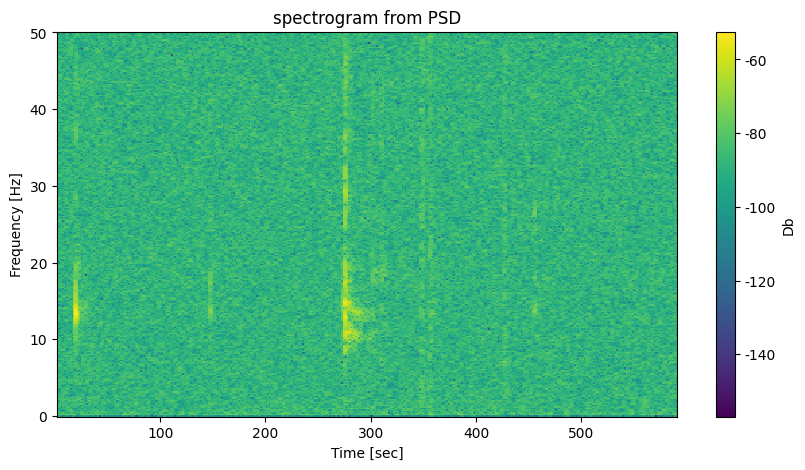

In [93]:
FRAME_SIZE = 512 #in frames
HOP_SIZE = 128
sr = 100
signalN = signald-np.mean(signald)


frequencies, times, spectrogram = signal.spectrogram(signalN,sr,nfft=FRAME_SIZE,noverlap=(FRAME_SIZE - HOP_SIZE), nperseg=FRAME_SIZE,mode='psd')
plt.figure(figsize=(10, 5))
plt.title('spectrogram from PSD')
plt.pcolormesh(times, frequencies, 10*np.log10(spectrogram))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(format="%+2.f", label='dB')

<function matplotlib.pyplot.show(close=None, block=None)>

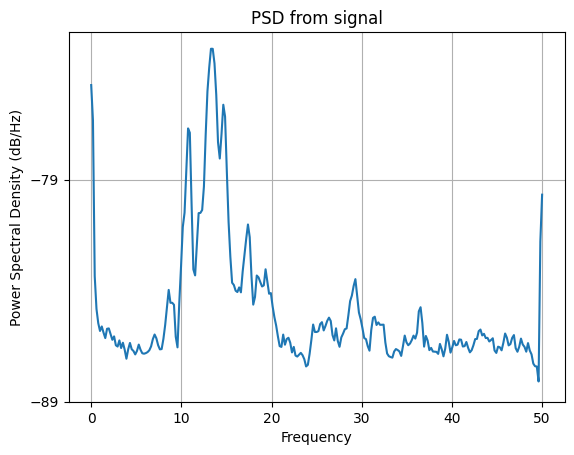

In [96]:
plt.psd(signalN, Fs=sr, pad_to=FRAME_SIZE, NFFT=FRAME_SIZE, noverlap=384)
plt.title("PSD from signal")
plt.show

In [97]:
from scipy.fft import fft, fftfreq

def printFFT2(window):

    # Number of sample points
    N = len(window)
    # sample spacing
    T = 1.0 / 100
    x = np.linspace(0.0, N*T, N, endpoint=False)
    yf = fft(window)
    xf = fftfreq(N, T)[:N//2]

    plt.plot(xf, np.log(np.abs(yf[0:N//2])))
    plt.title("FFT from signal")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Db |X(freq)|')
    plt.grid()
    plt.show()

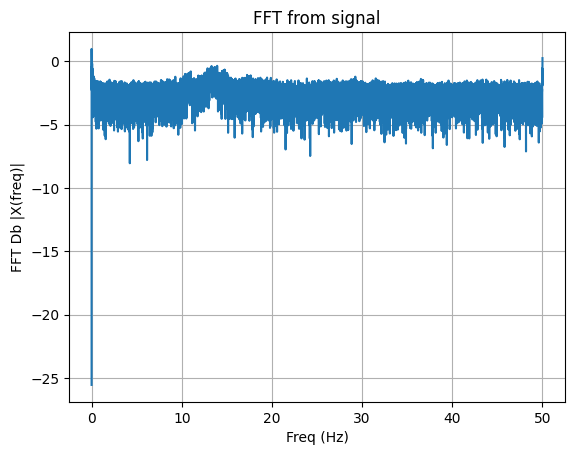

In [98]:
printFFT2(signalN)

In [37]:
def printPSD(window):

    f, Pxx_den = signal.welch(window, 100, nperseg=100)

    plt.semilogy(f, Pxx_den)
    plt.ylim([0.5e-10, 0.5e-5])
    plt.title("PSD from signal")
    plt.xlabel('frequency [Hz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.show()

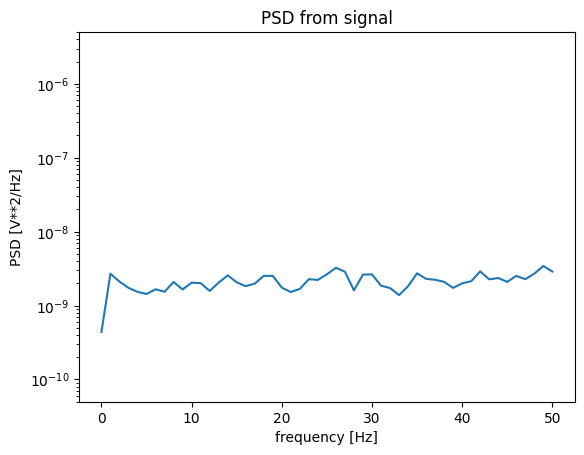

In [38]:
printPSD(signald[2000:3000])

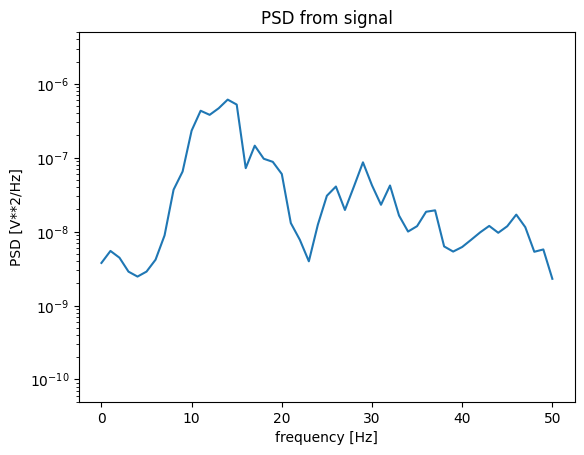

In [39]:
printPSD(signald[3000:4000])